## `Import Libraries`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [41]:
flight_train = pd.read_csv('C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/train.csv')
flight_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
flight_test = pd.read_csv('C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/test.csv')
flight_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [4]:
flight_final_sub = pd.read_csv('C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/sample_submission.csv')
flight_final_sub.head()

,Accident_ID,Severity
0,1,Minor_Damage_And_Injuries
1,10,Highly_Fatal_And_Damaging
2,14,Highly_Fatal_And_Damaging
3,17,Significant_Damage_And_Serious_Injuries
4,21,Minor_Damage_And_Injuries


In [5]:
flight_train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

## `EDA`

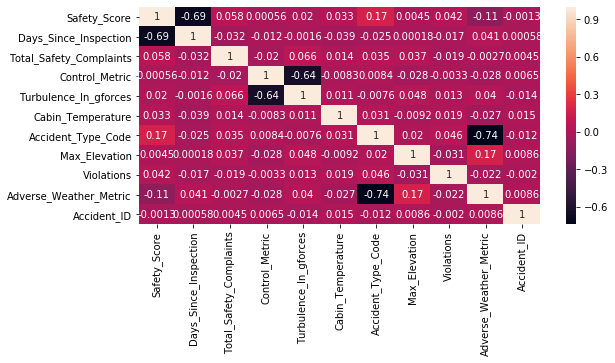

In [33]:
plt.figure(figsize=(9,4))
sns.heatmap(flight_train.corr(),annot=True)
           

Correlation between all the features 

In [7]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


There are no null values in the dataset.

In [8]:
flight_train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


### `Number of Severity count`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D984D89988>],
      dtype=object)

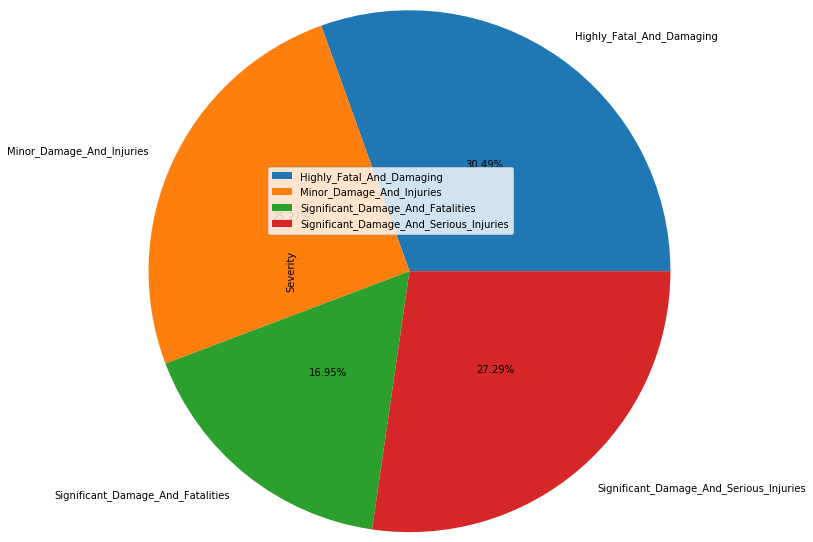

In [27]:
from matplotlib import pyplot as plt

r = flight_train.groupby(['Severity'])['Severity'].count().to_frame().plot.pie(subplots=True,autopct = '%.2f%%', pctdistance = 0.5,radius=3)
r
#plt.legend(r, loc="best")


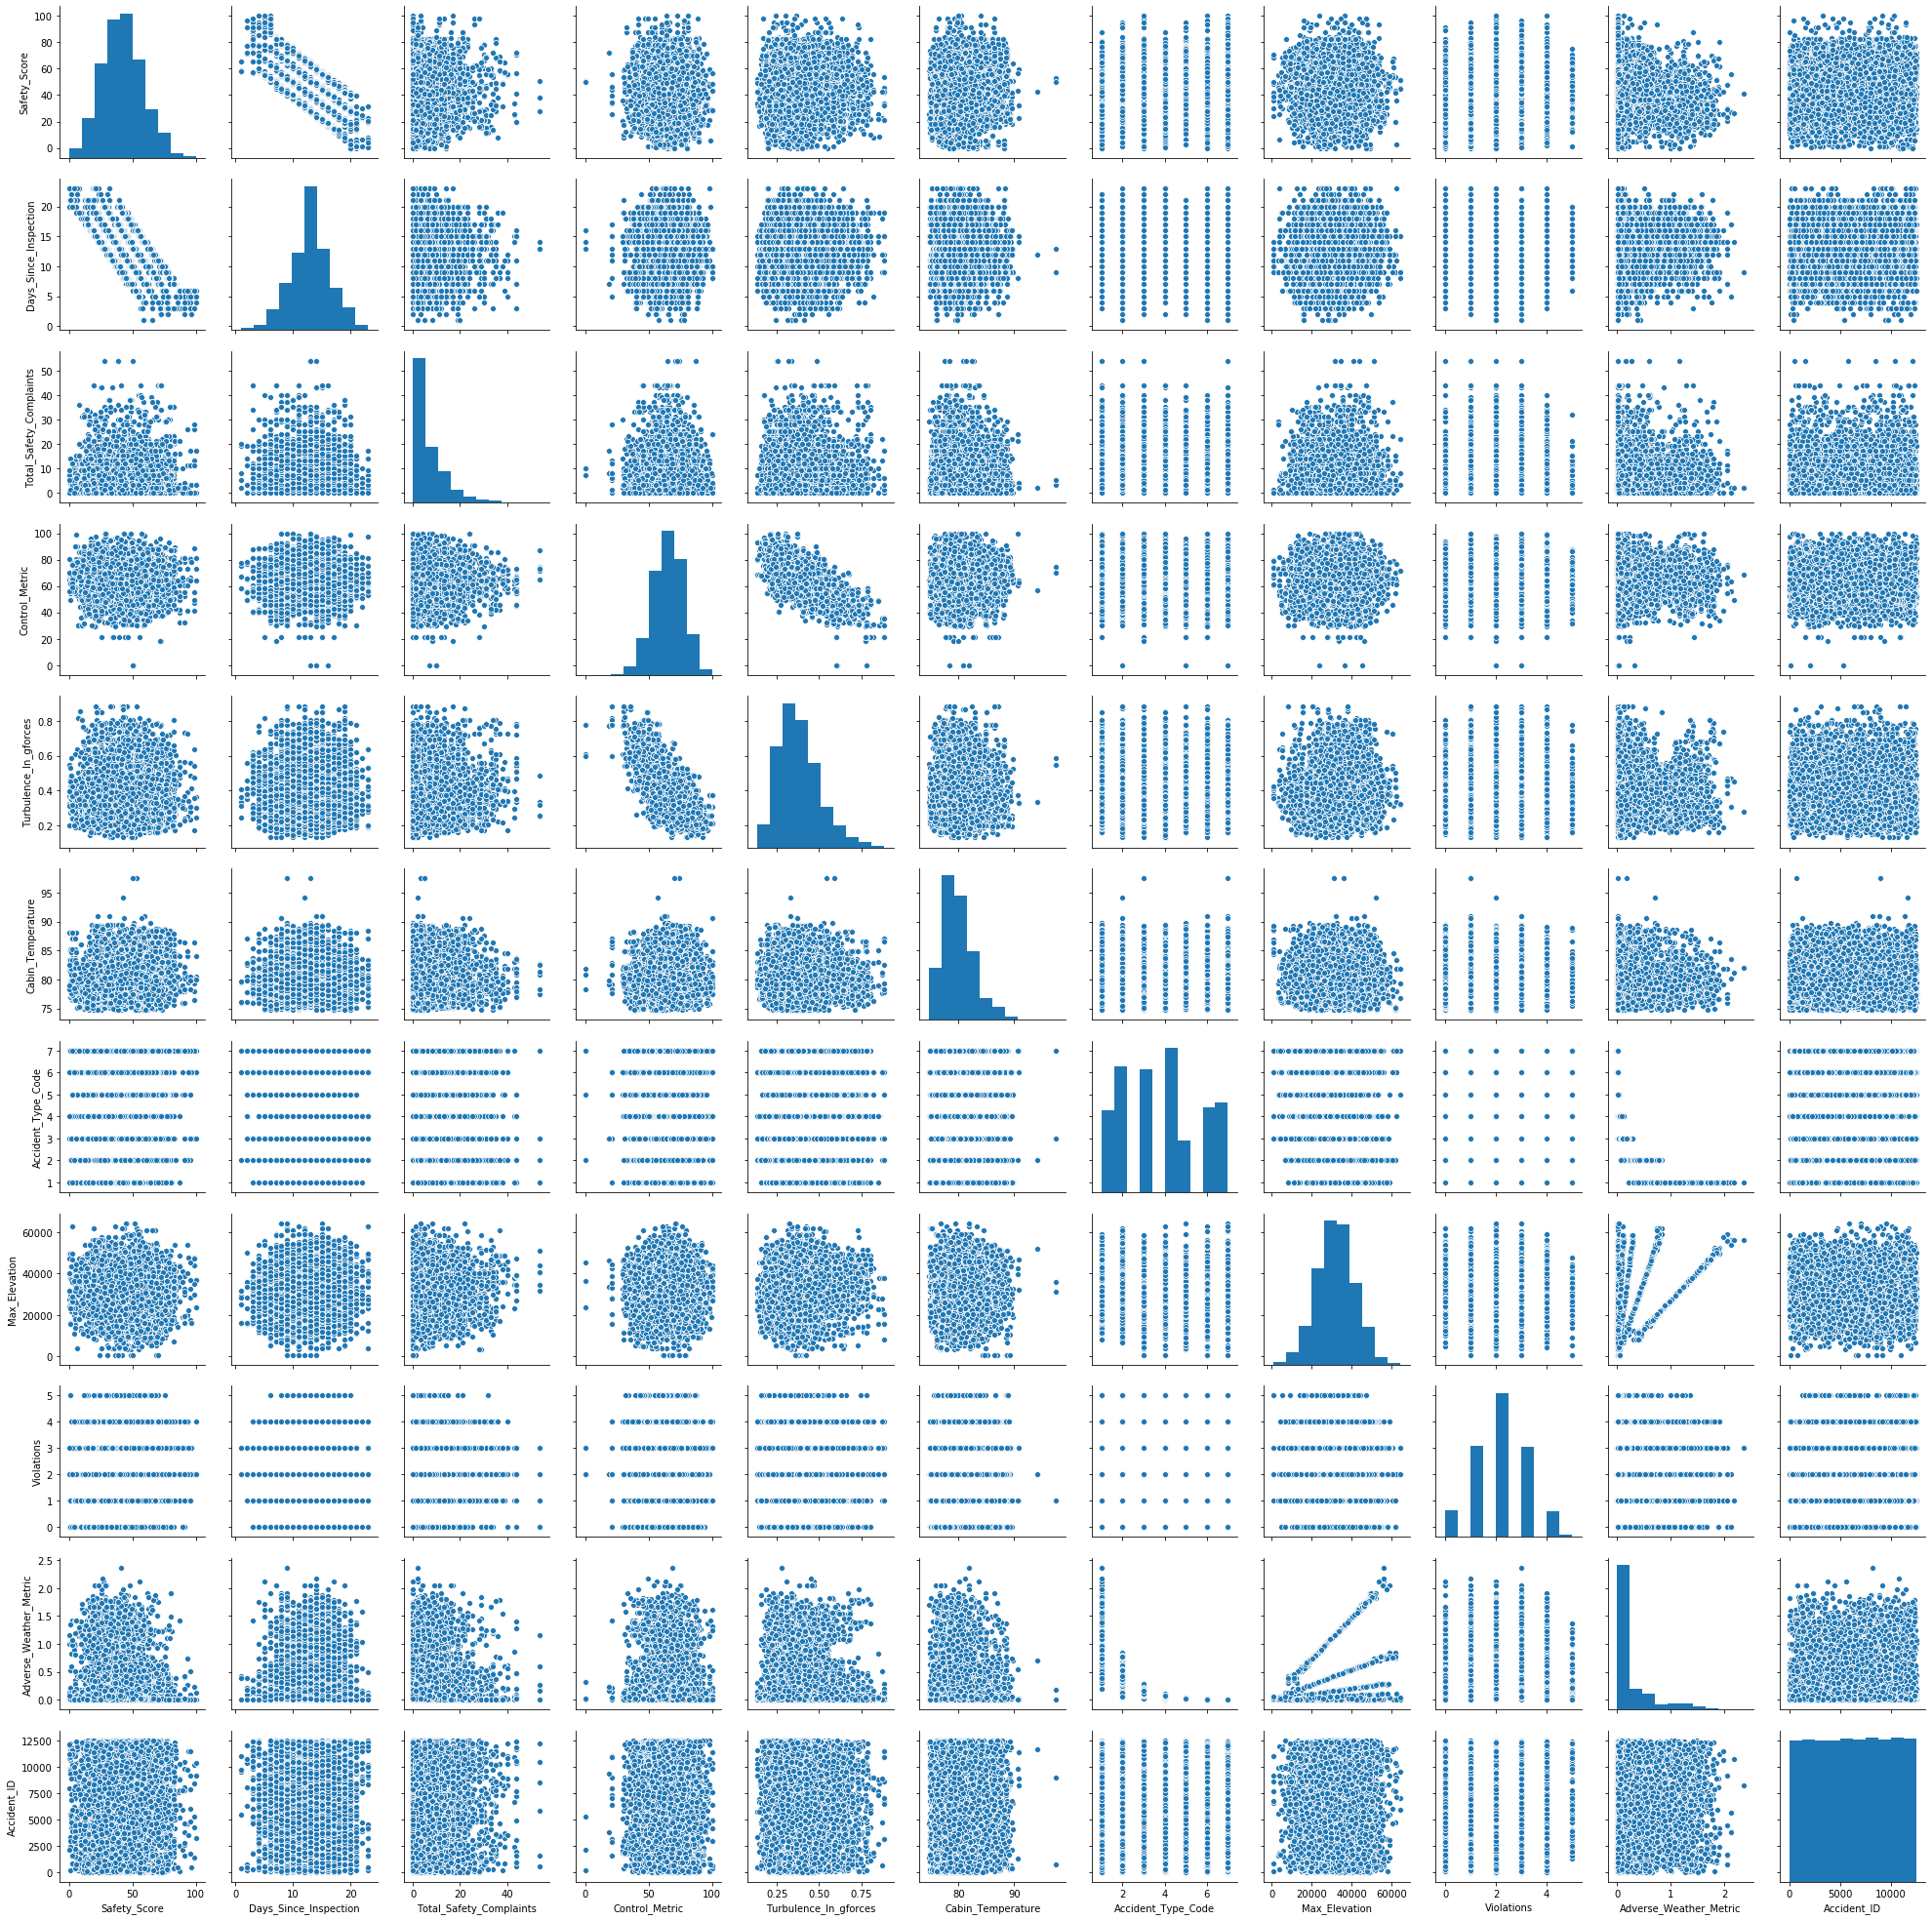

In [29]:
# It shows all the corelation 
import seaborn as sns

sns.pairplot(flight_train)

plt.show()

## `Data Preprocessing`

In [207]:
train = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/train.csv")
test = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/test.csv")

In [208]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
    
data = pd.concat([train,test], ignore_index = True)
data.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/data.csv",index=False)
print(train.shape, test.shape, data.shape)

C:\Users\Aakash Sharma\Anaconda3\envs\tft\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


(10000, 13) (2500, 12) (12500, 13)


In [209]:
data.head()

,Accident_ID,Accident_Type_Code,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Severity,Total_Safety_Complaints,Turbulence_In_gforces,Violations,source
0,7570,2,0.424352,78.04,71.285324,14,31335.476824,49.223744,Minor_Damage_And_Injuries,22,0.272118,3,train
1,12128,2,0.352350,84.54,72.288058,10,26024.711057,62.465753,Minor_Damage_And_Injuries,27,0.423939,2,train
2,2181,7,0.003364,78.86,66.362808,13,39269.053927,63.059361,Significant_Damage_And_Fatalities,16,0.322604,3,train
3,5946,3,0.211728,81.79,74.703737,11,42771.499200,48.082192,Significant_Damage_And_Serious_Injuries,9,0.337029,1,train
4,9054,3,0.176883,77.16,47.948952,13,35509.228515,26.484018,Significant_Damage_And_Fatalities,25,0.541140,2,train


## `Exporting Data`

In [212]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Severity','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/train_modified.csv",index=False)
test.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/test_modified.csv",index=False)

C:\Users\Aakash Sharma\Anaconda3\envs\tft\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## `Model, Predict and Solve the problem`

In [379]:
import pandas as pd
import numpy as np
train_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/train_modified.csv")
test_new= pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/test_modified.csv")

In [380]:
train_new.head()

,Accident_ID,Accident_Type_Code,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Severity,Total_Safety_Complaints,Turbulence_In_gforces,Violations
0,7570,2,0.424352,78.04,71.285324,14,31335.476824,49.223744,Minor_Damage_And_Injuries,22,0.272118,3
1,12128,2,0.352350,84.54,72.288058,10,26024.711057,62.465753,Minor_Damage_And_Injuries,27,0.423939,2
2,2181,7,0.003364,78.86,66.362808,13,39269.053927,63.059361,Significant_Damage_And_Fatalities,16,0.322604,3
3,5946,3,0.211728,81.79,74.703737,11,42771.499200,48.082192,Significant_Damage_And_Serious_Injuries,9,0.337029,1
4,9054,3,0.176883,77.16,47.948952,13,35509.228515,26.484018,Significant_Damage_And_Fatalities,25,0.541140,2


In [381]:
test_new.head()

,Accident_ID,Accident_Type_Code,Adverse_Weather_Metric,Cabin_Temperature,Control_Metric,Days_Since_Inspection,Max_Elevation,Safety_Score,Total_Safety_Complaints,Turbulence_In_gforces,Violations
0,1,4,0.069692,78.32,72.151322,16,37949.724386,19.497717,6,0.388959,2
1,10,7,0.002777,78.60,64.585232,15,30194.805567,58.173516,3,0.250841,2
2,14,6,0.004316,86.96,64.721969,15,17572.925484,33.287671,3,0.336669,1
3,17,3,0.199990,80.86,66.362808,21,40209.186341,3.287671,5,0.421775,2
4,21,2,0.483696,79.22,56.107566,18,35495.525408,10.867580,2,0.313228,2


In [382]:
print(train_new.shape, test_new.shape)

(10000, 12) (2500, 11)


In [383]:
#Dividing the data into test and train datasets
X = train_new.drop(['Severity'],axis=1)
y = train_new.Severity
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [385]:
#Logistic Regression without Standardization

lr=GradientBoostingClassifier(n_estimators=100)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#print(accuracy_score(y_test,y_pred))

score = 100 * (f1_score(y_test,y_pred, average='weighted'))
score

86.9724558423314

In [373]:
'''#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)'''

In [331]:
'''lr=RandomForestClassifier(n_estimators=100)
lr = lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
#print(accuracy_score(y_test,y_pred))

score = 100 * (f1_score(y_test,y_pred, average='weighted'))
score'''

91.62784809553658

In [386]:
y_pred

array(['Highly_Fatal_And_Damaging',
       'Significant_Damage_And_Serious_Injuries',
       'Minor_Damage_And_Injuries', ...,
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

## `Predict the severity of an Airplane Accident`

In [387]:
#Predict training set:
predictors = train_new.columns.drop(['Severity'])
train_new_predictions = lr.predict(train_new[predictors])
target = 'Severity'

In [388]:
# make predictions using actual model
test_new[target] = lr.predict(test_new[predictors])
#test_new[target].to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/severity_prediction.csv")
test_new[target]

0                     Highly_Fatal_And_Damaging
1             Significant_Damage_And_Fatalities
2       Significant_Damage_And_Serious_Injuries
3                     Highly_Fatal_And_Damaging
4             Significant_Damage_And_Fatalities
                         ...                   
2495                  Highly_Fatal_And_Damaging
2496    Significant_Damage_And_Serious_Injuries
2497    Significant_Damage_And_Serious_Injuries
2498    Significant_Damage_And_Serious_Injuries
2499                  Highly_Fatal_And_Damaging
Name: Severity, Length: 2500, dtype: object

In [389]:
final_submission = pd.DataFrame({'Accident_ID':test_new['Accident_ID'],'Severity':test_new[target]})
final_submission.set_index('Accident_ID',inplace=True)
final_submission.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Airplane accident/severity_prediction.csv")
final_submission.head()

,Severity
Accident_ID,
1,Highly_Fatal_And_Damaging
10,Significant_Damage_And_Fatalities
14,Significant_Damage_And_Serious_Injuries
17,Highly_Fatal_And_Damaging
21,Significant_Damage_And_Fatalities


## `Using RandomForestClassifier getting a f1_score of 91.81%`

# $$END$$